# Data Preparation Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data Set
https://www.kaggle.com/c/titanic/data

In [2]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Count Null Data

In [4]:
data.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

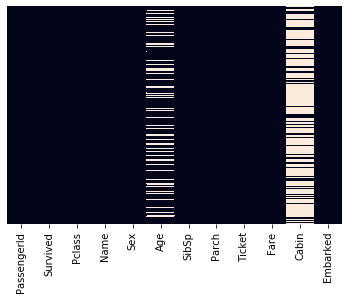

In [5]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

## Imputing Age Column by Mean

In [6]:
data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

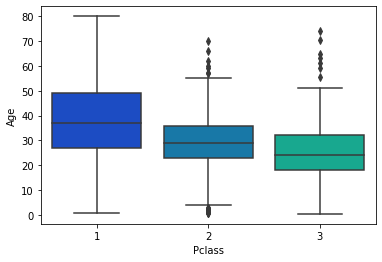

In [7]:
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

In [8]:
data[data['Pclass']==1]['Age'].mean()

38.233440860215055

In [9]:
data[data['Pclass']==2]['Age'].mean()

29.87763005780347

In [10]:
data[data['Pclass']==3]['Age'].mean()

25.14061971830986

In [11]:
def impute_age(columns):
    age = columns[0]
    pclass = columns[1]
    if pd.isnull(age):
        return data[data['Pclass']==pclass]['Age'].mean()
    else:
        return age

In [12]:
data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)

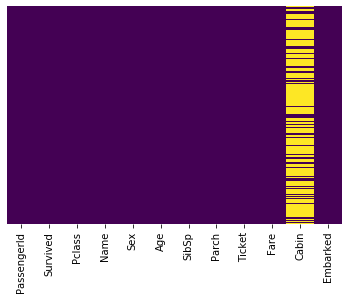

In [13]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
data.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Delete Cabin Column

In [15]:
data.drop('Cabin', axis=1, inplace=True)

In [16]:
data.isnull().sum(axis = 0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

## Delete Null Row

In [17]:
data.dropna(axis = 0, inplace=True)

In [18]:
data.isnull().sum(axis = 0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

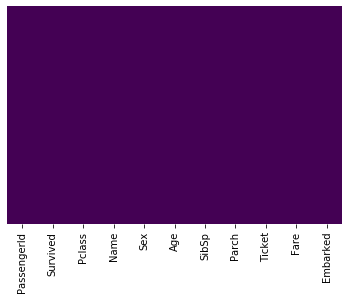

In [19]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
sex = pd.get_dummies(data['Sex'], drop_first=True)
embark = pd.get_dummies(data['Embarked'], drop_first=True)
data.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)
data = pd.concat([data, sex, embark], axis=1)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Decistion Tree

In [26]:
from sklearn.model_selection import train_test_split
X = data.drop('Survived',axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=77)

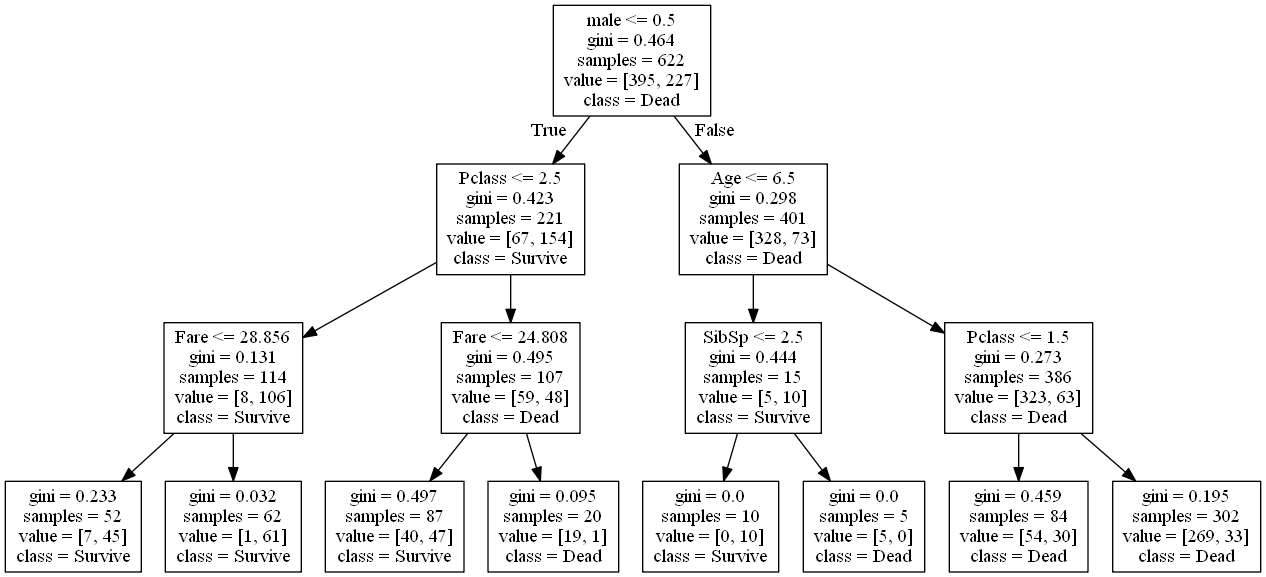

In [31]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create decision tree classifer object
classifer = DecisionTreeClassifier(random_state=77,max_depth=3, min_samples_leaf=5)

# Train model
model = classifer.fit(X_train, y_train)

dot_data = tree.export_graphviz(classifer, 
                                out_file = None, 
                                feature_names = data.drop('Survived',axis=1).columns,
                                class_names = ['Dead','Survive'])

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifer.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[142  12]
 [ 32  81]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       154
           1       0.87      0.72      0.79       113

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.83       267

